# Installing packages and data

## Packages

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

## Dataset

In [ ]:
training_set, testing_set = imdb.load_data(num_words = 10000)
X_train, y_train = training_set
X_test, y_test = testing_set

17473536/17464789 [==============================] - 0s 0us/step


`num_words` defines the maximum number of unique word to be loaded.

In [ ]:
# Let's print out some example
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


We see a sequence of numbers as the data has already been encoded. We can convert the review back to words, using the built-in word-to-index dictionary provided by Keras as part of the dataset

In [ ]:
word_to_id = imdb.get_word_index()
word_to_id = {key:(value+3) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
id_to_word = {value:key for key,value in word_to_id.items()}

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
print(' '.join(id_to_word[id] for id in X_train[159] ))

<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is


In [ ]:
# Let's print out the label of this comment
print(y_train[159])

0


In [ ]:
print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of testing samples = 25000


## Add Padding / Truncate


In order to standardize the input length so it can be fit into the model, we will have to add some "padding" into the data that less than 100, and truncate some reviews that is longer than 100 words length. (This could affect our data at some degree).

In [ ]:
X_train_padded = sequence.pad_sequences(X_train, maxlen= 100)
X_test_padded = sequence.pad_sequences(X_test, maxlen= 100)

let's verify the vector length after zero padding

In [ ]:
print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


# Model

In [ ]:
model = Sequential()

In [ ]:
# Let's add an Embedding layer to our model
model.add(Embedding(input_dim = 10000, output_dim = 128))

In [ ]:
# LSTM layer to our model
model.add(LSTM(units=128))

In [ ]:
# A dense layer to make sure our output has value of 0 and 1
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


# Train the model

Now, let's train our model for 10 epochs, using the testing set as the validation data

In order to compare different versions of our model, let's define a function to create a model that takes Optimizer as an argument

In [ ]:
def train_model(Optimizer, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Embedding(input_dim = 10000, output_dim = 128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = Optimizer, 
                  metrics=['accuracy'])
    scores = model.fit(X_train, y_train, batch_size=128, 
                       epochs=10, 
                       validation_data=(X_val, y_val), 
                       verbose=0)
    return scores, model

Using this function, let's train three different models using three different optimizers, the SGD, RMSprop, and the adam optimizer

In [ ]:
SGD_score, SGD_model = train_model(Optimizer = 'sgd',
                                   X_train=X_train_padded, 
                                   y_train=y_train, 
                                   X_val=X_test_padded,
                                   y_val=y_test)

RMSprop_score, RMSprop_model = train_model(Optimizer = 'RMSprop',
                                           X_train=X_train_padded,
                                           y_train=y_train,
                                           X_val=X_test_padded,
                                           y_val=y_test)

Adam_score, Adam_model = train_model(Optimizer = 'adam',
                                     X_train=X_train_padded,
                                     y_train=y_train,
                                     X_val=X_test_padded,
                                     y_val=y_test)

# Analyze the results

### Compare optimizers

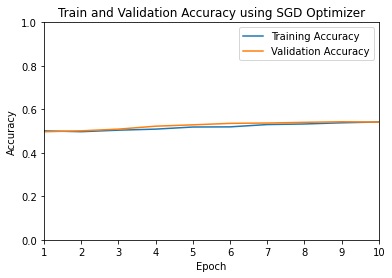

In [ ]:
# Model with SGD Optimizer
plt.plot(range(1,11), SGD_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_accuracy'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using SGD Optimizer')
plt.legend()
plt.show()

The training and validation accuracy is stuck at 50%. Clearly, the `sgd` optimizer is not suitable for this dataset and this LSTM network

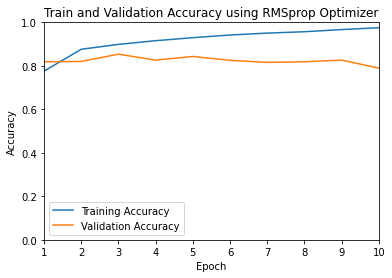

In [ ]:
# RMSprop Optimizer
plt.plot(range(1,11), RMSprop_score.history['accuracy'], 
         label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_accuracy'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

Our model is able to achieve a training accuracy of more than 95% and a validation accuracy of around 85% with the `RMSprop` optimizer

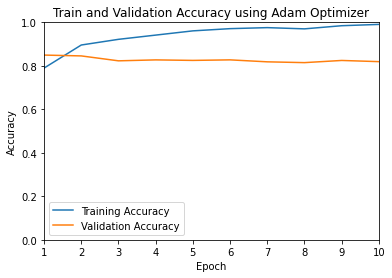

In [ ]:
# Adam optimizer
plt.plot(range(1,11), Adam_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_accuracy'], 
         label='Validation Accuracy')
plt.axis([1, 10, 0, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

We can see that the Training Accuracy is almost 100% after 10 epochs, while the Validation Accuracy is around 80%. This gap of 20% suggests that overfitting is happening

### Confusion Matrix

Text(56.499999999999986, 0.5, 'Actual')

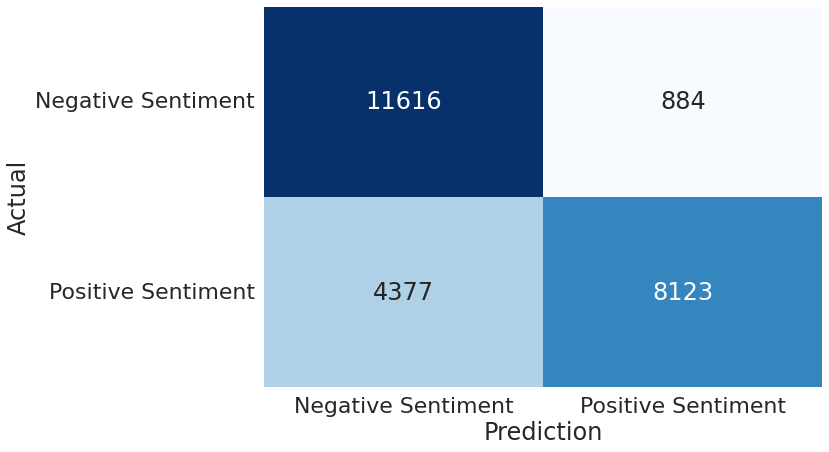

In [28]:
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
y_test_pred = RMSprop_model.predict(X_test_padded) > 0.5
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], yticklabels=['Negative Sentiment', 
                 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

Even our model is 85% accurate at predicting sentiment for movie reviews, it's noticable that the model's performance is great with the negative reviews but unreliable on the positive dataset: 1 on every 3 positive reviews are wrongly predicted! 

In [30]:
false_negatives = []
false_positives = []

for i in range(len(y_test_pred)):
    if y_test_pred[i][0] != y_test[i]:
        if y_test[i] == 0: # False Positive
            false_positives.append(i)
        else:
            false_negatives.append(i)

# Next step

It's clearly that the model needs to be improved on the positive dataset. There are several ways to achieve higher accuracy:
1. Domain Specific Features in the Corpus
2. Use An Exhaustive Stopword List
3. Noise Free Corpus
4. Eliminating features with extremely low frequency
5. Normalized Corpus
6. Use Complex Features: n-grams and part of speech tags